<a href="https://colab.research.google.com/github/Yosralla23/Yosralla23/blob/main/Forecaste_Airline_Passengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [200]:
import pandas as pd
import matplotlib.pyplot as plt

In [201]:
data=pd.read_csv("AirPassengers.csv")

In [202]:
data.head()# Display first 5

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [203]:
#Display statistics of the data
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


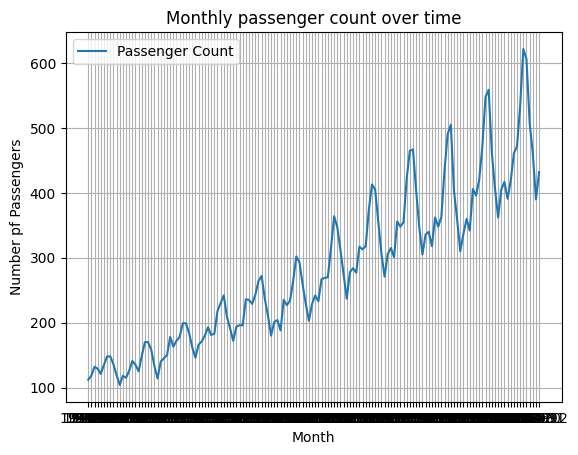

In [204]:
#Visualize data
plt.plot(data["Month"],data["#Passengers"], label="Passenger Count")
plt.title("Monthly passenger count over time")
plt.xlabel("Month")
plt.ylabel("Number pf Passengers")
plt.grid(True)
plt.legend()
plt.show()

In [205]:
#change the data type of column "Month" from object to datetime
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [206]:
data["Month"]= pd.to_datetime(data["Month"])

In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


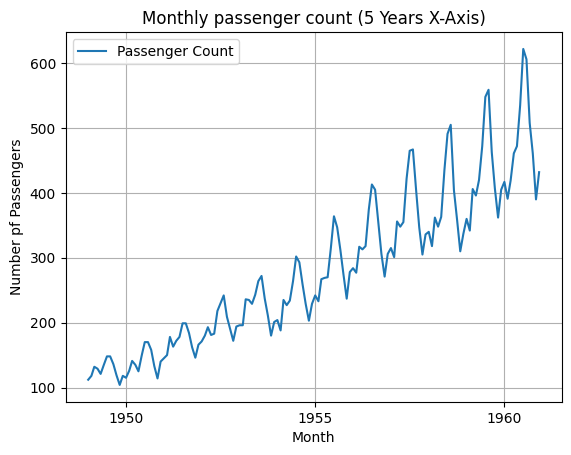

In [208]:
from matplotlib.dates import YearLocator

#Visualize data after updating data type of Month
plt.plot(data["Month"],data["#Passengers"], label="Passenger Count")
plt.title("Monthly passenger count (5 Years X-Axis)")
plt.xlabel("Month")
plt.ylabel("Number pf Passengers")

plt.gca().xaxis.set_major_locator(YearLocator(5))
plt.grid(True)
plt.legend()
plt.show()

In [209]:
from statsmodels.tsa.stattools import adfuller

In [210]:
time_series_data=data["#Passengers"]

result=adfuller(time_series_data)

In [211]:
print("ADF statistics: ", result[0])
print("p-value: ",result[1])
print("Critical Values: ",result[4])

ADF statistics:  0.8153688792060498
p-value:  0.991880243437641
Critical Values:  {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


In [212]:
if result[1] <= 0.05:
  print("The Time Series is Stationary.")
else:
  print("The Time Series is Not Stationary.")

The Time Series is Not Stationary.


In [213]:
#!pip install pmdarima


In [214]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

In [215]:
model = auto_arima(time_series_data, suppress_warnings=True, seasonal=False, stepwise=True)

In [216]:
model.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (4, 1, 3),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': False}

In [217]:
order=model.get_params()["order"]

arima_model=ARIMA(time_series_data, order=order)

In [218]:
arima_result=arima_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [219]:
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -674.913
Date:                Tue, 07 May 2024   AIC                           1365.825
Time:                        19:34:21   BIC                           1389.528
Sample:                             0   HQIC                          1375.457
                                - 144                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5582      0.117     -4.782      0.000      -0.787      -0.329
ar.L2          0.4935      0.113      4.375      0.000       0.272       0.715
ar.L3          0.1238      0.128      0.970      0.332      -0.126       0.374
ar.L4         -0.5213      0.085     -6.136      0.000      -0.688      -0.355
ma.L1          0.9069      0.094      9.657      0.000       0.723       1.091
ma.L2         -0.5590      0.145     -3.866      0.000      -0.842      -0.276
ma.L3         -0.7385      0.109     -6.778      0.000      -0.952      -0.525
sigma2       724.1731     85.616      8.458      0.000     556.369     891.977
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                14.59
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               5.66   Skew:                             0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

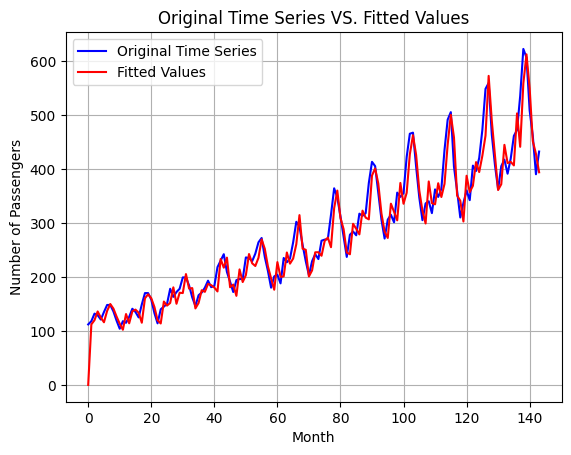

In [220]:
plt.plot(time_series_data, label="Original Time Series", color="blue")
plt.plot(arima_result.fittedvalues, label="Fitted Values",color="red")
plt.title("Original Time Series VS. Fitted Values")
plt.xlabel("Month")
plt.ylabel("Number of Passengers")
plt.legend()
plt.grid(True)
plt.show()

Forecast for the next 24 Months


In [221]:
forecast_steps=24

forecast_values= arima_result.get_forecast(steps=forecast_steps).predicted_mean


In [222]:
time_series_data.index = pd.to_datetime(time_series_data.index)
forecast_index = pd.date_range(start= time_series_data.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq="M")


<ipython-input-222-6be84b1967d6>:2: UserWarning: Discarding nonzero nanoseconds in conversion.
  forecast_index = pd.date_range(start= time_series_data.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq="M")


In [223]:

forecast_values

144    467.573736
145    490.494460
146    509.136849
147    492.554702
148    495.305965
149    475.947817
150    476.339865
151    475.552147
152    472.353805
153    483.889647
154    475.570149
155    485.921508
156    479.133602
157    480.987421
158    482.221399
159    476.211021
160    483.942815
161    475.847349
162    482.794250
163    479.011953
164    479.518625
165    482.449447
166    476.973939
167    483.511016
Name: predicted_mean, dtype: float64

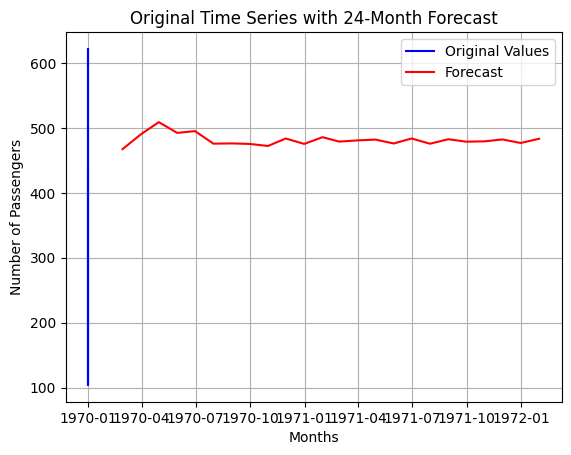

In [225]:
plt.plot(time_series_data.index, time_series_data, label="Original Values", color="blue")
plt.plot(forecast_index,forecast_values, label="Forecast" , color="red")
plt.title("Original Time Series with 24-Month Forecast")
plt.xlabel("Months")
plt.ylabel("Number of Passengers")
plt.legend()
plt.grid(True)
plt.show()